In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import scipy.fftpack
import scipy as sp
%matplotlib inline
sns.set()
pd.options.mode.use_inf_as_na = True

In [234]:
df = pd.read_csv('after_removing_multiplicative.csv',parse_dates=['date'])
df.head()

,Unnamed: 0,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,fluctuation
0,0,ahmednagar,bajri,2015,april,79.0,1406.0,1538.0,1463.0,2015-04-01,1.067232
1,1,akole,bajri,2015,april,52.0,1357.0,1800.0,1525.0,2015-04-01,1.112460
2,2,jamkhed,bajri,2015,april,164.0,1304.0,1446.0,1375.0,2015-04-01,1.003038
3,3,kopargaon,bajri,2015,april,354.0,1164.0,1469.0,1401.0,2015-04-01,1.022004
4,4,newasa,bajri,2015,april,32.0,1282.0,1293.0,1286.0,2015-04-01,0.938114


In [235]:
df.drop(['Unnamed: 0','fluctuation'],axis=1,inplace=True)
df.head()


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
0,ahmednagar,bajri,2015,april,79.0,1406.0,1538.0,1463.0,2015-04-01
1,akole,bajri,2015,april,52.0,1357.0,1800.0,1525.0,2015-04-01
2,jamkhed,bajri,2015,april,164.0,1304.0,1446.0,1375.0,2015-04-01
3,kopargaon,bajri,2015,april,354.0,1164.0,1469.0,1401.0,2015-04-01
4,newasa,bajri,2015,april,32.0,1282.0,1293.0,1286.0,2015-04-01


In [236]:
df.isnull().sum()
df.sort_values(by='date',inplace=True)

### First, we will get see how the mean of modal price changes with time by finding mean of all the commodities (individually, across all APMC) for each month. 
### <font color=red> Note: Taking a leap of faith that all the APMCs suffer the same price changes due to various factors e.g. 'drought'</font>

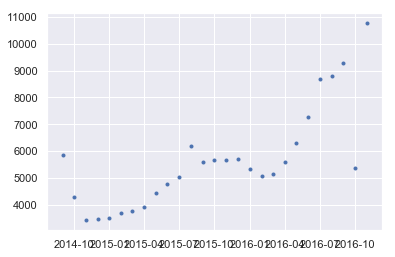

In [237]:
pune_gram = df[df['APMC']=='pune']
y = pune_gram[pune_gram['Commodity']=='gram']['modal_price'].tolist()
x = np.array(pune_gram[pune_gram['Commodity']=='gram']['date'])
plt.plot(x,y,'.')

In [238]:
def f(x,a,m): return a+np.multiply(m,x)

In [239]:
def decompose_trend(df,apmc_name,series_name,commodity_name):
    
    gh=df[df['APMC']==apmc_name]
    gh=gh[gh['Commodity']==commodity_name]
    gh = gh['modal_price']
    gh.dropna(inplace=True)### this is required because several commoditied dont have an observation for certain dates.
    ### so, aggregation makes such poits NaN. however, logically these points may jst be dropped.
    days_data = np.arange(0,len(gh))
    ydata = np.array(gh)
    xdata = days_data
    popt, pcov = scipy.optimize.curve_fit(f,xdata,ydata)
    residuals = ydata- f(xdata, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return [popt[0],popt[1],r_squared]

In [240]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [241]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y)
line = slope*x1+intercept
r_value

0.7796521837213685

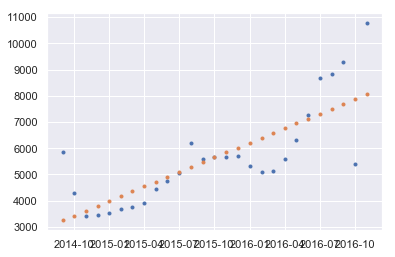

In [242]:
x1 = np.arange(0,len(y))
plt.plot(x,y,'.')
plt.plot(x,line,'.')

### Examining both, additive and multiplicative seasonality
### 1. Additive

In [268]:
residuals = y-line

In [269]:
len(residuals)

27

In [270]:
fo = np.split(residuals,9)

In [271]:
means = []
stds   = []
for i in range(0,len(fo)):
    means.append(fo[i].mean())
    stds.append(fo[i].std())
    print(means[i],'\t',stds[i])

1086.8500203500205 	 1162.4407513223816
-434.4411884411882 	 60.13014755575817
-502.39906389906383 	 156.5578016829183
239.30972730972766 	 484.7914389138716
-16.64814814814781 	 129.88102054003946
-839.9393569393573 	 405.86650714374593
-1081.2305657305653 	 330.7008383637503
936.8115588115592 	 559.8051565663322
611.6870166870167 	 2242.4201096669844


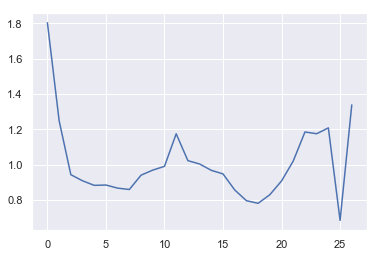

In [272]:
residuals = y/line
plt.plot(residuals)

In [273]:
means = []
stds   = []
for i in range(0,len(fo)):
    means.append(fo[i].mean())
    stds.append(fo[i].std())
    print(means[i],'\t',stds[i])

1086.8500203500205 	 1162.4407513223816
-434.4411884411882 	 60.13014755575817
-502.39906389906383 	 156.5578016829183
239.30972730972766 	 484.7914389138716
-16.64814814814781 	 129.88102054003946
-839.9393569393573 	 405.86650714374593
-1081.2305657305653 	 330.7008383637503
936.8115588115592 	 559.8051565663322
611.6870166870167 	 2242.4201096669844
